Steve Markstrom
Thu Feb 11 09:05:21 MST 2020 

This notebook contains simple examples to show how to use notebooks with xarray on ONMH output ncf files. These examples use the "onhm" python package that is availaible from https://github.com/nhm-usgs/pangeo/src/onhm

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

stream_shape='/caldera/projects/usgs/water/wbeep/onhm/GIS/streamSegsAllConus/segsAllConus.shp'
hru_shape='/caldera/projects/usgs/water/wbeep/onhm/GIS/hrusAllConus/hrusAllConus.shp'

The next cell demonstrates the get_DataSet() function from the onhm package. This function lazy loads all of the netcdf files found in the specified path into xarray DataArrays and loads each of these DataArrays into a single xarray DataSet. 

In [2]:
    # path is the path to were there are output PRMS ncf files
    # ext is the file extention on these files
    # The python package "onhm" can be built from the source code at https://github.com/nhm-usgs/pangeo/src/onhm
    
    import onhm
    
    # For example, to see the results of the historical ONHM runs on Denali, the path would be
    path = '/caldera/projects/usgs/water/wbeep/onhm/historical/output/'
    #path = '/work/markstro/operat/setup/test/NHM-PRMS_CONUS/output/'
    ext = '.nc'
    
    ds_out = onhm.reader.get_DataSet(path, ext)
    print(ds_out)

<xarray.Dataset>
Dimensions:              (hruid: 109951, segid: 56460, time: 14569)
Coordinates:
  * hruid                (hruid) int32 1 2 3 4 5 ... 109948 109949 109950 109951
  * time                 (time) datetime64[ns] 1979-10-01T05:00:00 ... 2019-08-20T05:00:00
  * segid                (segid) int32 1 2 3 4 5 ... 56457 56458 56459 56460
Data variables:
    hru_lat              (hruid) float64 ...
    hru_lon              (hruid) float64 ...
    unused_potet         (time, hruid) float64 ...
    gwres_in             (time, hruid) float64 ...
    newsnow_out          object None
    seg_lat              (segid) float64 ...
    seg_lon              (segid) float64 ...
    segment_delta_flow   (time, segid) float64 ...
    transp_on            (time, hruid) float64 ...
    tmaxf                (time, hruid) float64 ...
    dprst_vol_open_frac  (time, hruid) float64 ...
    potet                (time, hruid) float64 ...
    hru_streamflow_out   (time, hruid) float64 ...
    pref_flo

To get the time series for a paticular variable for a single HRU

In [3]:
    # Get the values for all HRUs for an output variable for a single time step
    var_name = 'pkwater_equiv'
    time_step = '2000-04-01'
    sel1 = ds_out[var_name].sel(time=time_step)
    
    # This is an xarray DataArray
    print(sel1)
    # This is a numpy ndarray
    print("numpy.ndarray=", sel1.values)
    print('number of hrus = ', sel1.values.size)

<xarray.DataArray 'pkwater_equiv' (time: 1, hruid: 109951)>
[109951 values with dtype=float64]
Coordinates:
  * hruid    (hruid) int32 1 2 3 4 5 6 ... 109947 109948 109949 109950 109951
  * time     (time) datetime64[ns] 2000-04-01T05:00:00
Attributes:
    long_name:      Snowpack water equivalent on each HRU
    standard_name:  pkwater_equiv
    units:          mm
numpy.ndarray= [[0. 0. 0. ... 0. 0. 0.]]
number of hrus =  109951


0.0 2589.33442


(array([0.08083925, 0.06818883, 0.05522987, 0.05708115, 0.04412218,
        0.03671706, 0.04011108, 0.03147177, 0.02530083, 0.02344955,
        0.02344955, 0.02098118, 0.01697007, 0.01697007, 0.02036409,
        0.01481024, 0.01573588, 0.01604443, 0.01079914, 0.01511879,
        0.01789571, 0.01265042, 0.01203332, 0.01203332, 0.01141623,
        0.0098735 , 0.01079914, 0.01018204, 0.00802222, 0.0098735 ,
        0.00740512, 0.01018204, 0.01265042, 0.00833076, 0.00863931,
        0.00833076, 0.01110768, 0.00771367, 0.00617093, 0.00740512,
        0.00709658, 0.00802222, 0.00555384, 0.00833076, 0.00833076,
        0.00524529, 0.00833076, 0.00647948, 0.00833076, 0.00802222,
        0.00771367, 0.00709658, 0.00617093, 0.00863931, 0.00555384,
        0.00678803, 0.00586239, 0.00678803, 0.00802222, 0.00647948,
        0.00524529, 0.00617093, 0.00277692, 0.00647948]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28

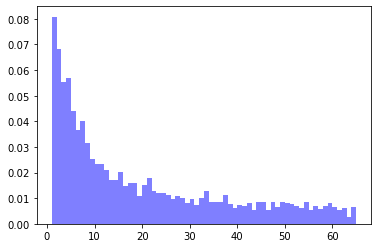

In [5]:
vals = (sel1.values)[0]
print(min(vals), max(vals))
plt.hist(vals, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
                     25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
                     51,52,53,54,55,56,57,58,59,60,61,62,63,64,65],
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

#plt.show()

In [6]:
# Load the shapefile

hrus = gpd.read_file(hru_shape)
hrus.tail()

,hru_id_loc,region,Shape_Leng,Shape_Area,nhm_id,geometry
109550,5833,r18,17913.488995,8.807662e+06,109947,"MULTIPOLYGON (((-2263604.535 2392521.026, -226..."
109551,5834,r18,77677.159623,2.080113e+08,109948,"MULTIPOLYGON (((-2049524.773 2421374.883, -204..."
109552,5835,r18,16497.251706,7.575803e+06,109949,"POLYGON ((-2038034.866 2408355.185, -2038004.9..."
109553,5836,r18,93805.415589,1.698602e+08,109950,"POLYGON ((-2055375.223 2477985.130, -2055254.7..."
109554,5837,r18,45023.398405,7.309876e+07,109951,"MULTIPOLYGON (((-2039684.775 2461244.802, -203..."


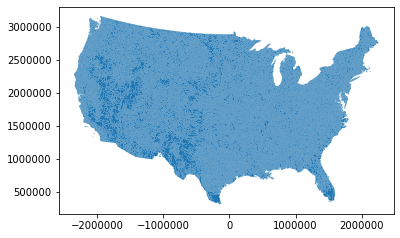

In [7]:
# Basic plot
hrus.plot()


In [8]:
foo = np.zeros(109555)

nhm_id = hrus["nhm_id"]
print(nhm_id)
print(nhm_id.shape)

#count = 0
for ii in range(109554):
    foo[ii] = vals[nhm_id[ii]]
#    if temps[ii] == 0.0:
#        count = count + 1
#print(count)

0              1
1              2
2              3
3              4
4              5
           ...  
109550    109947
109551    109948
109552    109949
109553    109950
109554    109951
Name: nhm_id, Length: 109555, dtype: int64
(109555,)


In [9]:
hrus['pkwater_equiv'] = foo
hrus.head

<bound method NDFrame.head of         hru_id_loc region    Shape_Leng    Shape_Area  nhm_id  \
0                1    r01  27679.398793  9.999432e+06       1   
1                2    r01  20181.458616  1.104901e+07       2   
2                3    r01   7234.718196  1.970528e+06       3   
3                4    r01   2177.637490  1.625316e+05       4   
4                5    r01   6678.093684  1.790298e+06       5   
...            ...    ...           ...           ...     ...   
109550        5833    r18  17913.488995  8.807662e+06  109947   
109551        5834    r18  77677.159623  2.080113e+08  109948   
109552        5835    r18  16497.251706  7.575803e+06  109949   
109553        5836    r18  93805.415589  1.698602e+08  109950   
109554        5837    r18  45023.398405  7.309876e+07  109951   

                                                 geometry  pkwater_equiv  
0       POLYGON ((1866649.356 2233274.866, 1866614.954...            0.0  
1       POLYGON ((1864274.703 2238165.0

In [10]:
coolwarm = cm.get_cmap('coolwarm', 12)

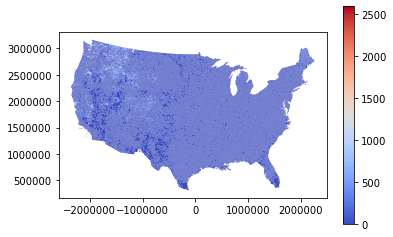

In [11]:
fig, ax = plt.subplots(1, 1)

hrus.plot(column='pkwater_equiv', cmap='coolwarm', ax=ax, legend=True)

In [ ]:
minx, miny, maxx, maxy = hrus.total_bounds
print(minx, miny, maxx, maxy)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(-2354935, -1500000)
ax.set_ylim(2500000, 3200000)
hrus.plot(column='pkwater_equiv', cmap='coolwarm', ax=ax, legend=True)